### Topic:  What Factors Influence Loan Approval

Many people apply for loans or credits each year, yet not all of them are approved. While approved applicants are able to fulfill their financial needs, those who are rejected often face disappointments and challenges. The objective of this project is to identify the key factors and correlations that influence loan approval decisions. 

For this research, loan data consisting of 44,972 records has been used to analyze the reasons and elements that influence the loan approval process. To remove the effect of extreme outliers, entries with ages ranging from 109 to 144 years old were excluded, as they are irrelevant. Additionally, borrowers with incomes between one million and over two million dollars were excluded, as it seems unreasonable for individuals with such a high income to apply for a small loan amount as eight thoudsand dollars. Removing these records will stabilize the data an make analysis more relevent by focusing on typical borrowers.

#### First, Descriptive Statistics displayed to better understand statistics of the dataset.

In [1]:
from scipy.stats import skew
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Loading the dataset and saving into the data_file variable
data_file = pd.read_csv('C:/Users/maxim/OneDrive/Desktop/BU/DSC 530/loan_data.csv')

In [2]:
# Renaming columns for readability
data_file = data_file.rename(columns={
    'person_age': 'age',
    'person_income': 'income',
    'person_emp_exp': 'emp_exp',
    'loan_amnt': 'loan',
    'loan_int_rate': 'rate',
    'loan_percent_income': 'loan_to_inc',
    'cb_person_cred_hist_length': 'cred_hist',
    'credit_score': 'score',
    'loan_status': 'status'
})

# Convert relevant columns to integer types where needed
data_file['income'] = data_file['income'].astype(int)
data_file['loan'] = data_file['loan'].astype(int)
data_file['score'] = data_file['score'].astype(int)

# Convert loan_to_inc to percentage and round to 2 decimal places
data_file['loan_to_inc'] = (data_file['loan_to_inc'] * 100).round(2)

# Round 'rate' to two decimals
data_file['rate'] = data_file['rate'].round(2)

# Convert categorical 'status' column to meaningful labels (0 -> 'Declined', 1 -> 'Approved')
data_file['status'] = data_file['status'].map({0: 'Declined', 1: 'Approved'})

# Generate descriptive statistics and format the output, excluding the 'count' row
summary = data_file.describe().drop('count')

# Apply formatting to each column individually using apply() to avoid FutureWarning
for column in summary.columns:
    if column not in ['rate', 'loan_to_inc']: 
        summary[column] = summary[column].map(lambda x: f'{x:,.0f}')  
    else:
        summary[column] = summary[column].map(lambda x: f'{x:,.2f}')  

# Display the descriptive statistics table
display(summary)

# Skewness Calculation
skewness_values = {} 
continuous_columns = ['age', 'income', 'emp_exp', 'loan', 'rate', 'loan_to_inc', 'cred_hist', 'score']

# Calculate skewness for each relevant column and store values in skewness_values dictionary
for column in continuous_columns:
    if column in data_file.columns:
        skew_value = skew(data_file[column], nan_policy='omit')
        skewness_values[column] = round(skew_value, 2)  
        
# Create a DataFrame for skewness values and remove the index
skewness_df = pd.DataFrame(list(skewness_values.items()), columns=['Column', 'Skewness'])

# Displaying skewness separately
print("\nSkewness of Columns:")
print(skewness_df.to_string(index=False))

,age,income,emp_exp,loan,rate,loan_to_inc,cred_hist,score
mean,28,"79,248",5,"9,582",11.01,13.98,6,633
std,6,"54,684",6,"6,313",2.98,8.72,4,50
min,20,"8,000",0,500,5.42,0.00,2,390
25%,24,"47,172",1,"5,000",8.59,7.00,3,601
50%,26,"67,040",4,"8,000",11.01,12.00,4,640
75%,30,"95,698",8,"12,236",13.00,19.00,8,670
max,94,"994,605",76,"35,000",20.00,66.00,30,784



Skewness of Columns:
     Column  Skewness
        age      1.91
     income      4.61
    emp_exp      1.95
       loan      1.18
       rate      0.21
loan_to_inc      1.04
  cred_hist      1.63
      score     -0.62


### Using Visualizations for Exploratory Data Analysis(EDA) to better understand the dataset.

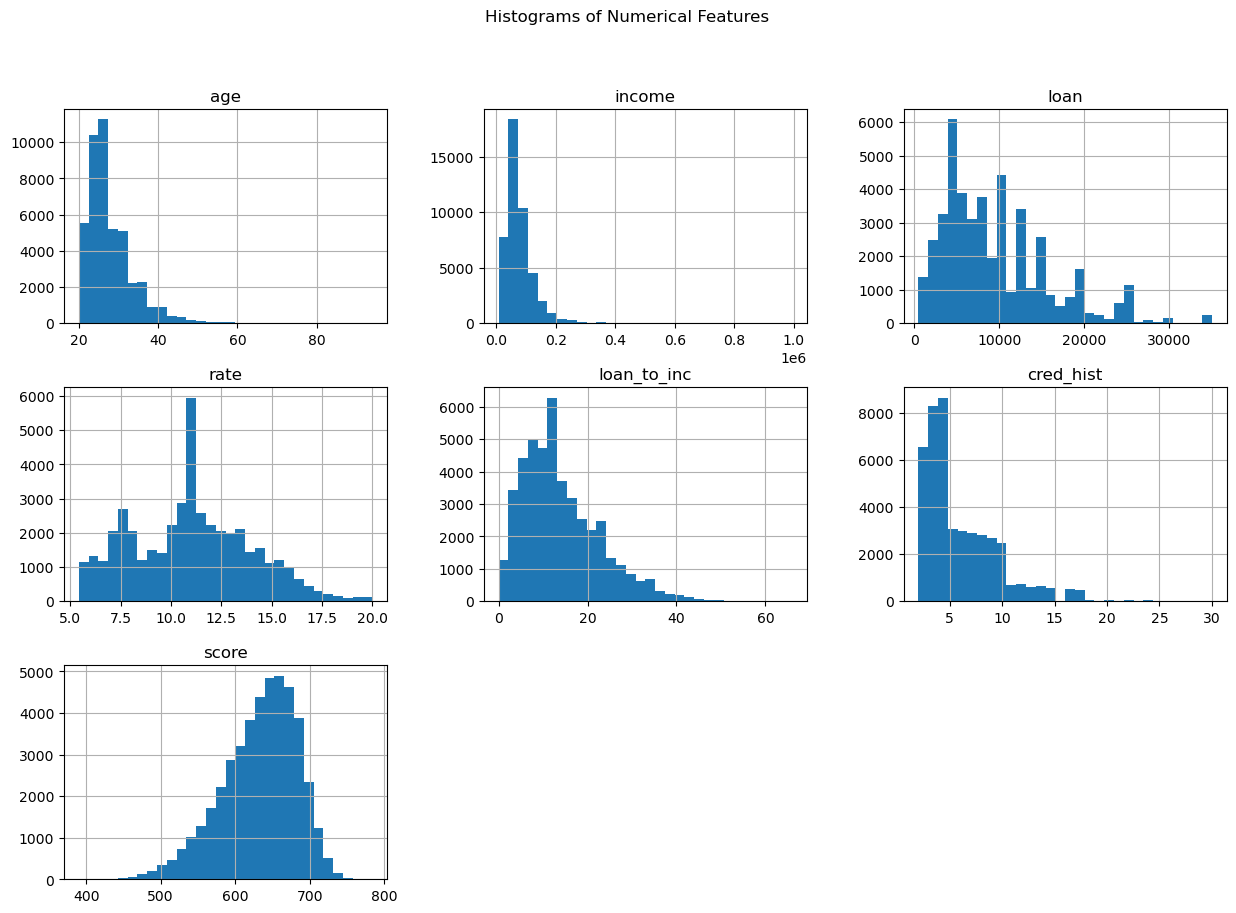

In [3]:
# Visualizing distributions of numerical features
numerical_features = ['age', 'income', 'loan', 'rate', 'loan_to_inc', 'cred_hist', 'score']
data_file[numerical_features].hist(bins=30, figsize=(15, 10))
plt.suptitle('Histograms of Numerical Features')
plt.show()

From the above images we can see that all but except one chart have positive skewed distributions. The distributions are positively skewed with longer tail on the right side. Only distribution for score is negatively skewed with longer tail on the left side.

### Calculating Correlation Matrix and Visualizing results using Heatmap

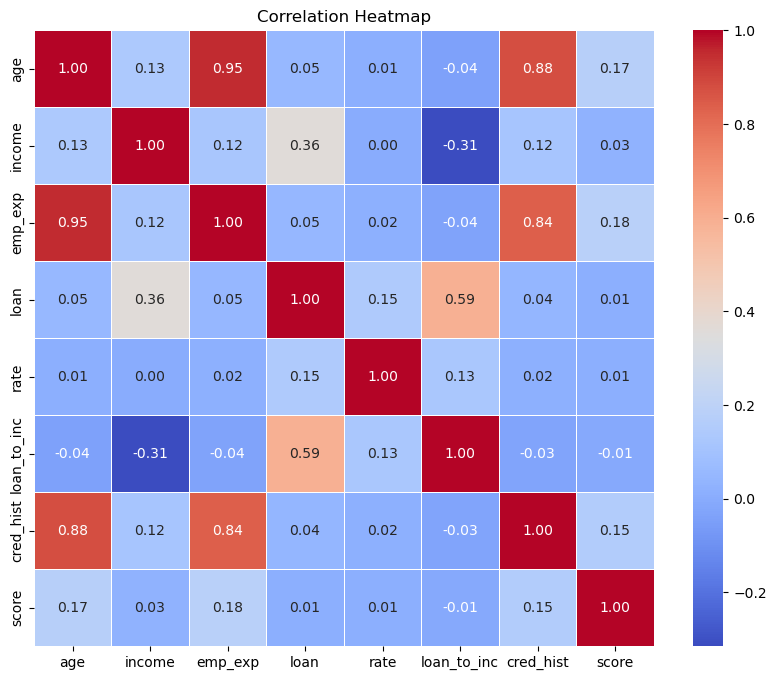

In [4]:
# Selecting only columns with numeric values the dataframe for correlation analysis
numeric_data = data_file.select_dtypes(include=[np.number])

# Correlation matrix heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

### Utilizing more advanced library to visualize correlation of each pair in the heatmap for easier interpretation.

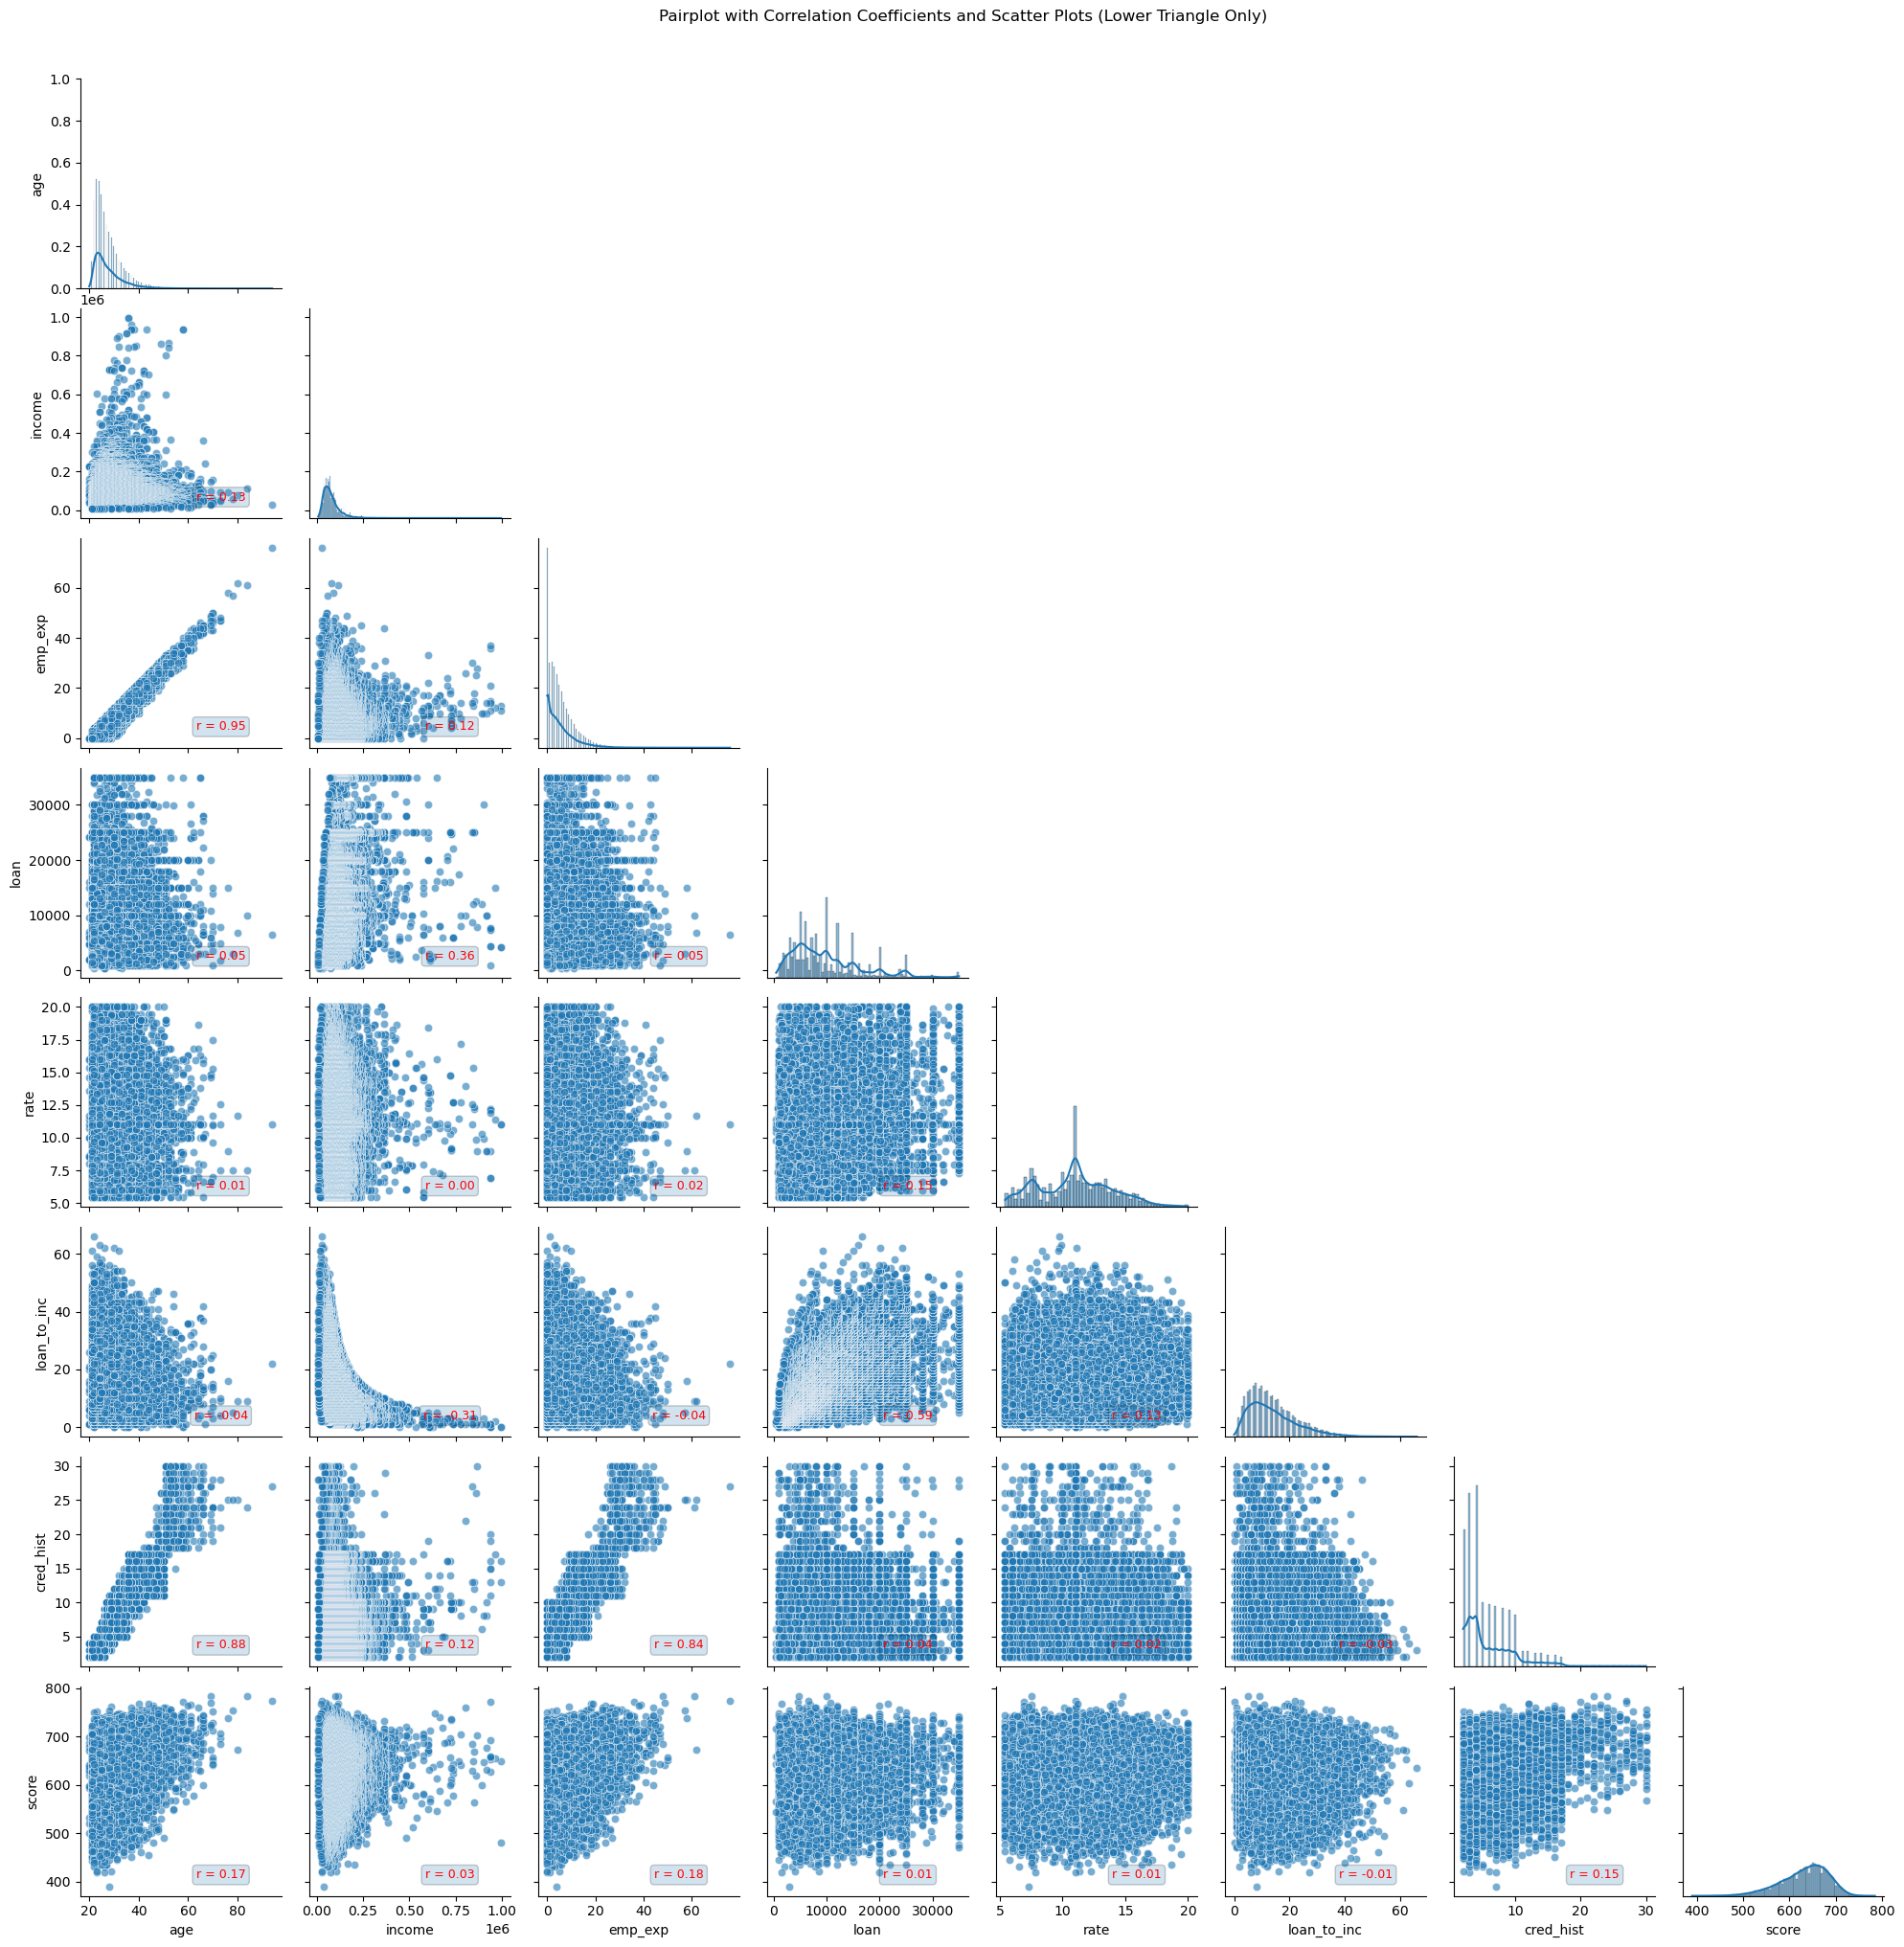

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Selecting only numeric columns from the dataframe
numeric_data = data_file.select_dtypes(include=[np.number])

# Custom function to overlay correlation coefficient on scatter plots
def scatter_with_correlation(x, y, **kwargs):
    sns.scatterplot(x=x, y=y, **kwargs, alpha=0.6)
    corr = np.corrcoef(x, y)[0, 1]
    ax = plt.gca()
    ax.annotate(f"r = {corr:.2f}", xy=(0.7, 0.1), xycoords=ax.transAxes, 
                ha='center', va='center', fontsize=9, color='red', bbox=dict(boxstyle="round", alpha=0.2))

# Creating a PairGrid and customize it
g = sns.PairGrid(numeric_data)

# Only fill the lower triangle
g.map_lower(scatter_with_correlation)
g.map_diag(sns.histplot, kde=True)  # Histogram and KDE on the diagonal

# Leaving the upper triangle blank
for i, j in zip(*np.triu_indices_from(g.axes, 1)):
    g.axes[i, j].set_visible(False)

# Adding a title to the entire grid
plt.suptitle("Pairplot with Correlation Coefficients and Scatter Plots (Lower Triangle Only)", y=1.02)
plt.show()

### Visualizing Income distribution and loan amount for better understanding.

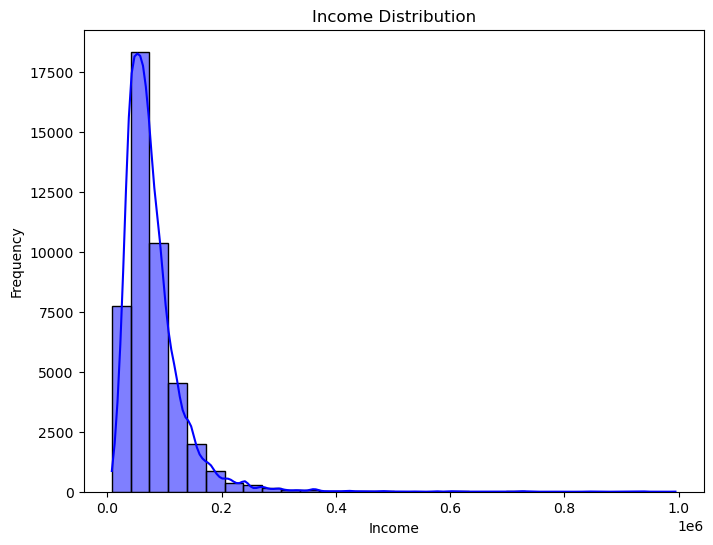

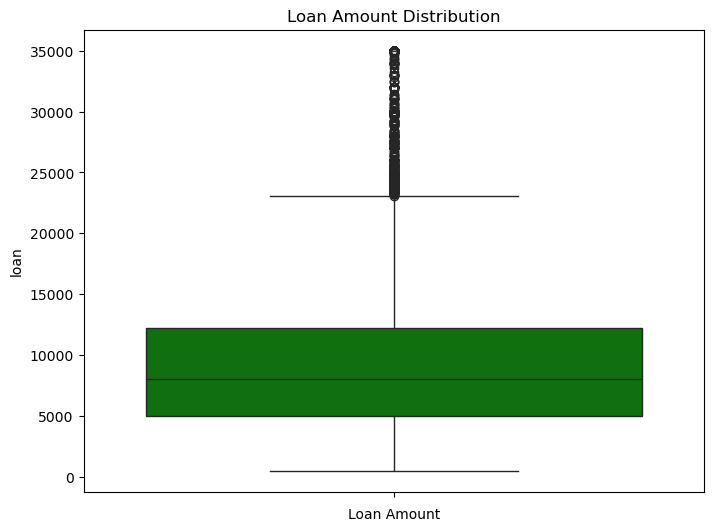

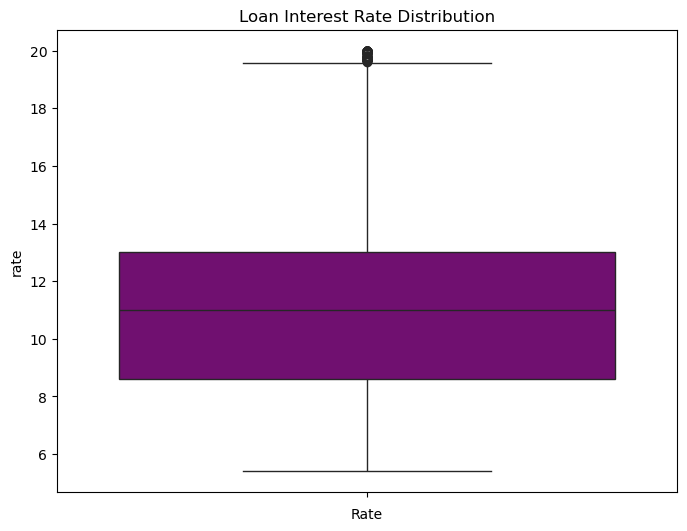

In [6]:
# Histogram for 'income'
plt.figure(figsize=(8,6))
sns.histplot(data_file['income'], kde=True, bins=30, color='blue')
plt.title('Income Distribution')
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.show()

# Boxplot for 'loan'
plt.figure(figsize=(8,6))
sns.boxplot(data_file['loan'], color='green')
plt.title('Loan Amount Distribution')
plt.xlabel('Loan Amount')
plt.show()

# Boxplot for 'rate' (interest rate)
plt.figure(figsize=(8,6))
sns.boxplot(data_file['rate'], color='purple')
plt.title('Loan Interest Rate Distribution')
plt.xlabel('Rate')
plt.show()

### Visualizing loan status using box plots graph

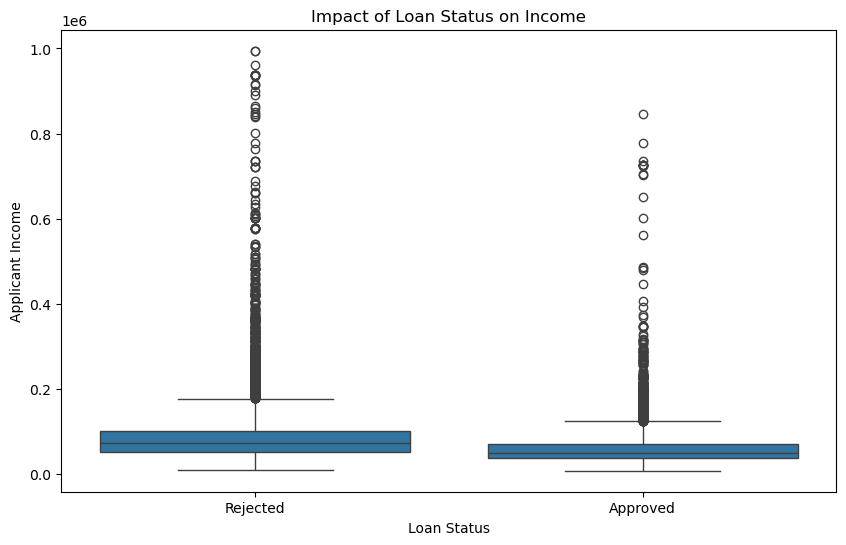

In [7]:
# Box plots to analyze the impact of loan status on numerical features
plt.figure(figsize=(10, 6))
sns.boxplot(x='status', y='income', data=data_file)
plt.title('Impact of Loan Status on Income')
plt.xlabel('Loan Status')
plt.ylabel('Applicant Income')
plt.xticks(ticks=[0, 1], labels=['Rejected', 'Approved'])
plt.show()

### Below boxplot visually shows the impact of age on Loan Approval.

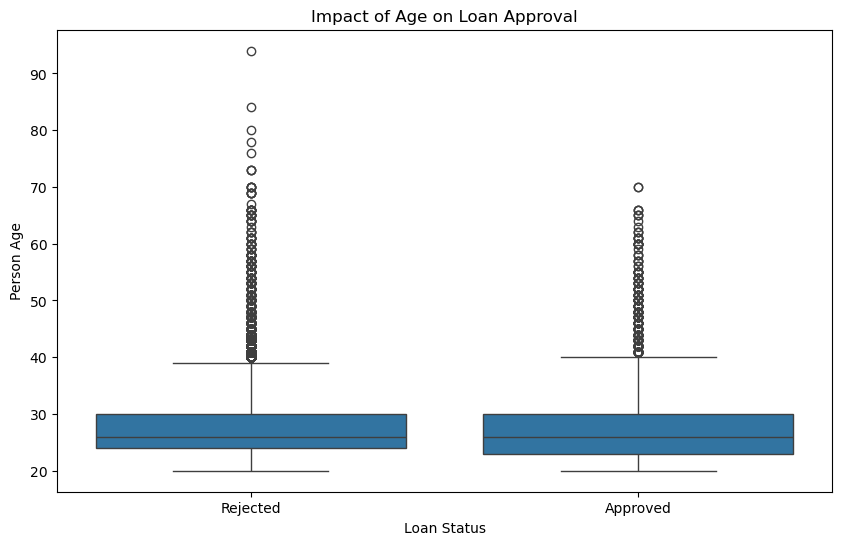

In [8]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='status', y='age', data=data_file)
plt.title('Impact of Age on Loan Approval')
plt.xlabel('Loan Status')
plt.ylabel('Person Age')
plt.xticks(ticks=[0, 1], labels=['Rejected', 'Approved'])
plt.show()

### Is there correlation between loan amount and applicant income?

Null hypothesis(N0) --> There is no significan correlation between loan amount and applicant income.

Alternative hypothesis(H1) --> There is a significant correlation between loan amount and applicant income.

#### Visualizing Loan Amount and Applicant Income to observe if there any relationship and calculating correlation.

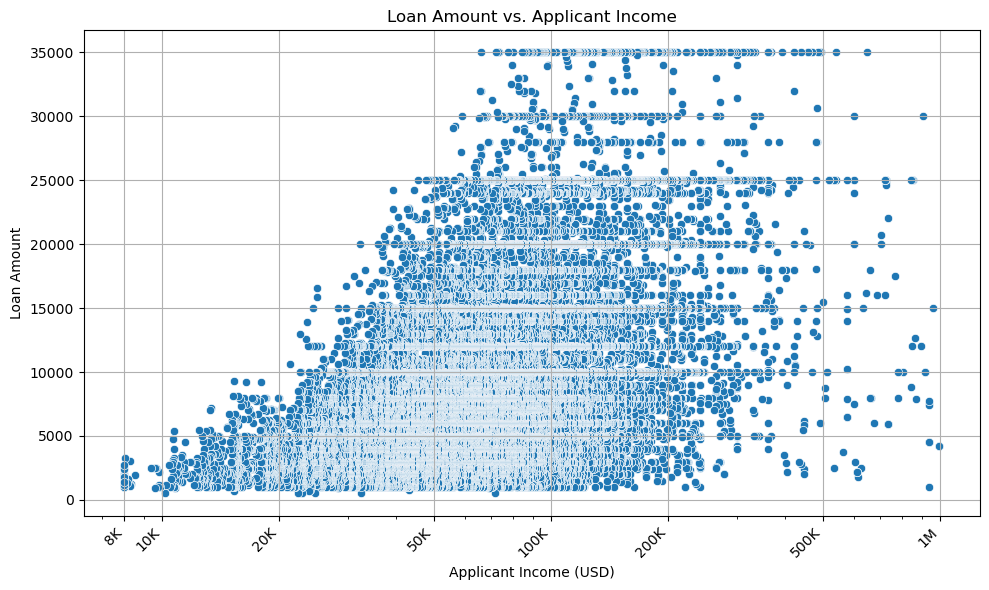

Correlation between loan amount and applicant income: 0.3591279074724612

Pearson correlation coefficient: 0.36
P-value: 0.0000
95% Confidence Interval for the correlation: (0.34489291206060646, 0.373023264392821)


In [9]:
import pandas as pd
from scipy.stats import pearsonr
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Loading your dataset
file_path = 'C:/Users/maxim/OneDrive/Desktop/BU/DSC 530/loan_data.csv'
data_file = pd.read_csv(file_path)

# Creating the scatter plot for loan_amount vs. person_income with log scale
plt.figure(figsize=(10, 6))  # Large figure size for better readability
sns.scatterplot(x='person_income', y='loan_amnt', data=data_file)
plt.title('Loan Amount vs. Applicant Income')
plt.xlabel('Applicant Income (USD)')
plt.ylabel('Loan Amount')

# Setting the x-axis to log scale
plt.xscale('log')

# Set custom x-axis ticks with more granular intervals for lower values
ticks = [8000, 10000, 20000, 50000, 100000, 200000, 500000, 1000000]
labels = [f'{int(tick/1000)}K' if tick < 1000000 else f'{int(tick/1000000)}M' for tick in ticks]
plt.xticks(ticks, labels, rotation=45, ha='right')
plt.tight_layout()  
plt.grid(True) 
plt.show()

# Calculating the correlation
correlation = data_file['loan_amnt'].corr(data_file['person_income'])
print(f"Correlation between loan amount and applicant income: {correlation}")

# Performing Pearson correlation coefficient test
correlation_coefficient, p_value = pearsonr(data_file['loan_amnt'], data_file['person_income'])
print(f"\nPearson correlation coefficient: {correlation_coefficient:.2f}")
print(f"P-value: {p_value:.4f}")

# Confidence Interval
bootstrap_samples = 1000
bootstrap_correlations = []
for _ in range(bootstrap_samples):
    bootstrap_sample = data_file.sample(frac=1, replace=True)
    bootstrap_correlations.append(bootstrap_sample['loan_amnt'].corr(bootstrap_sample['person_income']))
confidence_interval = (np.percentile(bootstrap_correlations, 2.5), np.percentile(bootstrap_correlations, 97.5))
print(f"95% Confidence Interval for the correlation: {confidence_interval}")

Based on the above calculated results there is a positive correlation between loan amount and applicant income. The Pearson correlation of 0.36 indicates that as applicant income increases, the loan amount increases as well. Additionaly, the p-value of 0.0000 indicates that the correlation is statistically signinficant. We have a strong reason to believe that this correlation is not due to random chance. Thus, we have a strong evidence to reject null hypothesis(H0) that there is no correlation exist in favor of the alternative hypothesis(H1) that there is a correlation present between the two variables. The 95% confidence interval for the correlation is (0.345, 0.371). This is the range within which we expect the true population correlation coefficient will likely to lie. Because zero not inclued in the interval, it further supports the significance of the correlation between applicant income and loan amount. Otherwise, if the interval included zero then it would mean that the true population correlation coefficient could be zero which would mean there is no relationship between the two variables.

### To better understand the Loan statuses the distribution is plotted using histogram.

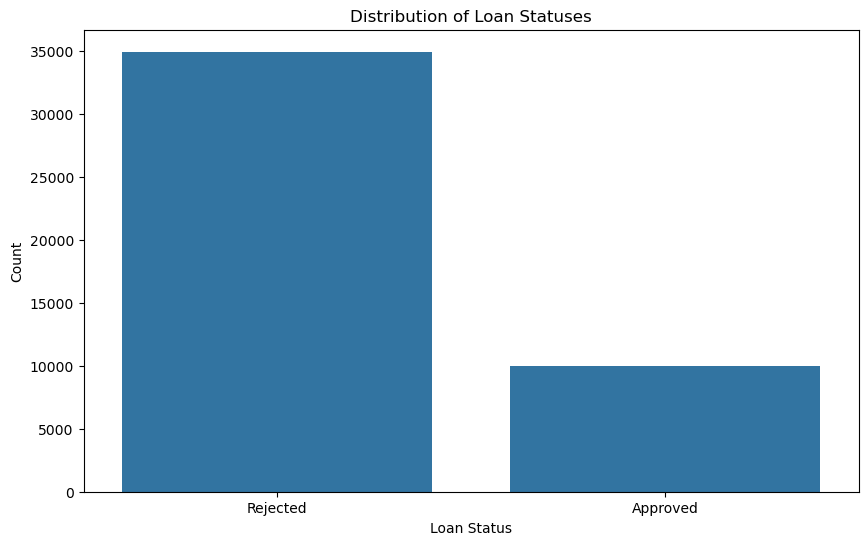

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Loading your dataset
file_path = 'C:/Users/maxim/OneDrive/Desktop/BU/DSC 530/loan_data.csv'
data_file = pd.read_csv(file_path)

# Creating a bar plot for the loan statuses to visually see the final decision status
plt.figure(figsize=(10, 6))
sns.countplot(x='loan_status', data=data_file)
plt.title('Distribution of Loan Statuses')
plt.xlabel('Loan Status')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Rejected', 'Approved'])
plt.show()

From the above histogram we can see a big disparity between approvals and rejections. Approximately 35,000 loans rejected and 10,000 approved.

### Is there any relation between loan amount as a percentage of annual income and loan status?

Null hypothesis(N0) --> There is no significan relationship between the loan amount as a percentage of annual income and loan status.

Alternative hypothesis(H1) --> There is a significant relationship between the loan amount as a percentage of annual income and loan status.

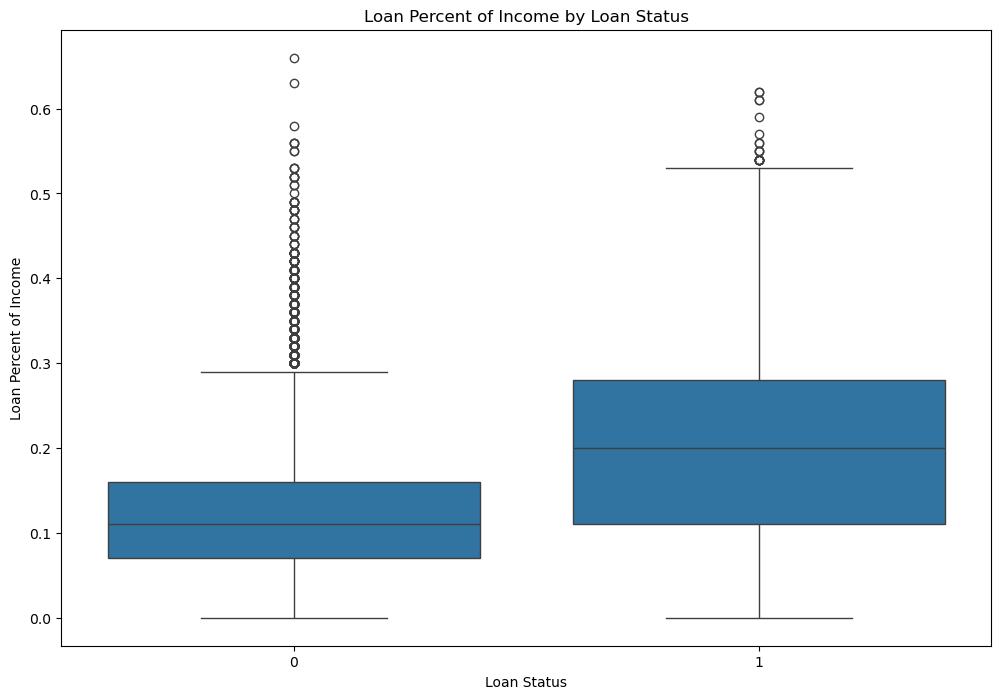

T-statistic: 88.38908275942002
P-value: 0.0
U-statistic: 253482621.0
P-value: 0.0


In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Loading your dataset
file_path = 'C:/Users/maxim/OneDrive/Desktop/BU/DSC 530/loan_data.csv'
data_file = pd.read_csv(file_path)

# 1. Visualizing the relationship with a boxplot
plt.figure(figsize=(12, 8))
sns.boxplot(x='loan_status', y='loan_percent_income', data=data_file)
plt.title('Loan Percent of Income by Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Loan Percent of Income')
plt.show()

# 2. Statistical Test (T-test)

# Separating the data based on loan status (assuming loan_status is binary: 0 = Rejected, 1 = Approved)
approved = data_file[data_file['loan_status'] == 1]['loan_percent_income']
declined = data_file[data_file['loan_status'] == 0]['loan_percent_income']

# Checking if both groups have data
if approved.size > 0 and declined.size > 0:
    # Perform t-test
    t_stat, p_value = stats.ttest_ind(approved, declined, nan_policy='omit')

    # Display the result
    print(f"T-statistic: {t_stat}")
    print(f"P-value: {p_value}")

    # If data is not normally distributed, use Mann-Whitney U test:
    u_stat, p_value = stats.mannwhitneyu(approved, declined, alternative='two-sided')
    print(f"U-statistic: {u_stat}")
    print(f"P-value: {p_value}")
else:
    print("One or both of the groups (approved or declined) have no data.")

The calculated results indicate that there is a significant relationship between the loan amount as a percentage of annual income and loan status. Both tests performed have a P-value of 0, suggesting that the differences observed are highly significant and unlikely to be due to random chance. This strongly suggests that there is a significant relationship between the loan amount as a percentage of income and the loan status. Additionally, we can infer that a higher percentage of loan amount relative to income is likely to result in the loan being declined.

###	Is there correlation between person employment experience and loan approval rates?

Defining two hypothesis as follows:

Null hypothesis(N0) --> There is no significan correlation between a person's employment experience and loan approval rates.

Alternative hypothesis(H1) --> There is a significant correlation between a person employment experience and loan approval rates.


Pearson correlation coefficient between employment experience and loan approval: -0.02
P-value: 0.0001

Linear Regression Model: 
Coefficient: -0.00, Intercept: 0.23


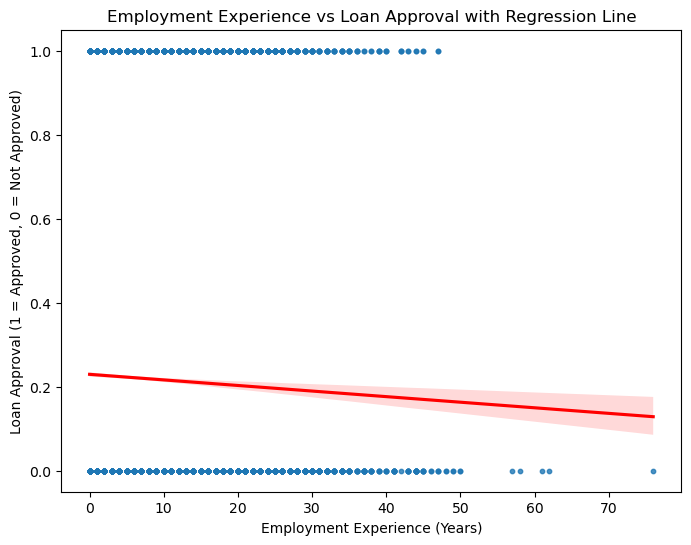

In [12]:
import pandas as pd
from scipy.stats import pearsonr
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

# Removing rows with missing values in 'person_emp_exp' or 'loan_status'
data_file = data_file.dropna(subset=['person_emp_exp', 'loan_status'])

# Converting 'loan_status' to a binary outcome (1 = Approved, 0 = Declined)
data_file['loan_approval'] = data_file['loan_status'].apply(lambda x: 1 if x == 1 else 0)

# Calculating Pearson correlation coefficient between 'person_emp_exp' and 'loan_approval'
if len(data_file['person_emp_exp'].unique()) > 1 and len(data_file['loan_approval'].unique()) > 1:
    correlation, p_value = pearsonr(data_file['person_emp_exp'], data_file['loan_approval'])
    print(f"\nPearson correlation coefficient between employment experience and loan approval: {correlation:.2f}")
    print(f"P-value: {p_value:.4f}")
else:
    print("\nSkipping correlation calculation due to lack of variability in 'person_emp_exp' or 'loan_approval'.")

# Fitting a Linear Regression model to predict loan approval based on employment experience
X = data_file[['person_emp_exp']]
y = data_file['loan_approval']

# Initializing and fitting the Linear Regression model
model = LinearRegression()

if len(data_file['person_emp_exp'].unique()) > 1:
    model.fit(X, y)
    print(f"\nLinear Regression Model: \nCoefficient: {model.coef_[0]:.2f}, Intercept: {model.intercept_:.2f}")

    # Predicting loan approval probabilities based on the model
    data_file['predicted_approval'] = model.predict(X)

    # Visualizing the regression line along with the scatter plot
    plt.figure(figsize=(8, 6))
    sns.regplot(x='person_emp_exp', y='loan_approval', data=data_file, scatter_kws={'s': 10}, line_kws={'color': 'red'})
    plt.title('Employment Experience vs Loan Approval with Regression Line')
    plt.xlabel('Employment Experience (Years)')
    plt.ylabel('Loan Approval (1 = Approved, 0 = Not Approved)')
    plt.show()
else:
    print("\nSkipping Linear Regression due to lack of variability in 'person_emp_exp'.")


Based on the calculated results, we can reject the null hypothesis that states there is no correlation between employment experience and loan approval rate in favor of the alternative hypothesis that there is a correlation between the two variables. Although the calculated Pearson's correlation of -0.02 is extremely low and close to zero, the p-value of 0.0001 is less than the significance level of 5%. This provides strong statistical evidence that the observed correlation is not due to random chance. Nevertheless, the Pearson's correlation of -0.02 is so small that, in practical terms, it tells us very little about the relationship between employment experience and loan approval rates. This suggests that there are likely other factors that have a stronger influence on loan approval rates.

### Does person's employment experience correlate with credit score?

Null hypothesis(N0) --> There is no significan correlation between a person's employment experience and credit score.

Alternative hypothesis(H1) --> There is a significant correlation between a person's employment experience and credit score.


Pearson correlation coefficient between employment experience and credit score: 0.18
P-value: 0.0000

Linear Regression Model: 
Coefficient: 1.56, Intercept: 624.20


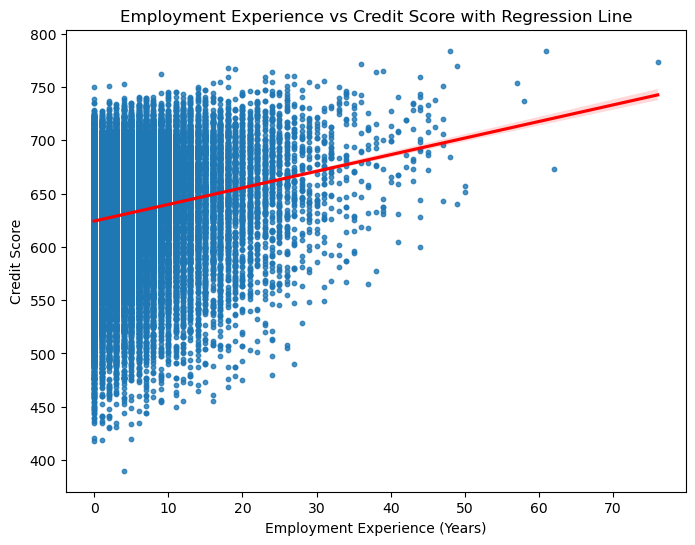

In [13]:
import pandas as pd
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns

# Loading the dataset
file_path = 'C:/Users/maxim/OneDrive/Desktop/BU/DSC 530/loan_data.csv'
data_file = pd.read_csv(file_path)

# Checking if 'person_emp_exp' and 'credit_score' columns exist
if 'person_emp_exp' in data_file.columns and 'credit_score' in data_file.columns:
    # Drop rows with missing values in 'person_emp_exp' or 'credit_score'
    data_file = data_file.dropna(subset=['person_emp_exp', 'credit_score'])

    # Calculating Pearson correlation coefficient between 'person_emp_exp' and 'credit_score'
    if len(data_file['person_emp_exp'].unique()) > 1 and len(data_file['credit_score'].unique()) > 1:
        correlation_credit, p_value_credit = pearsonr(data_file['person_emp_exp'], data_file['credit_score'])
        formatted_p_value = f"{p_value_credit:.4f}"
        print(f"\nPearson correlation coefficient between employment experience and credit score: {correlation_credit:.2f}")
        print(f"P-value: {formatted_p_value}")
    else:
        print("\nSkipping correlation calculation due to lack of variability in 'person_emp_exp' or 'credit_score'.")

    # Fitting a Linear Regression model to predict credit score based on employment experience
    X = data_file[['person_emp_exp']] 
    y = data_file['credit_score']     

    model = LinearRegression()

    if len(data_file['person_emp_exp'].unique()) > 1:
        model.fit(X, y)
        print(f"\nLinear Regression Model: \nCoefficient: {model.coef_[0]:.2f}, Intercept: {model.intercept_:.2f}")

        # Predicting credit score based on the model
        data_file['predicted_credit_score'] = model.predict(X)

        # Visualizing the scatter plot with regression line
        plt.figure(figsize=(8, 6))
        sns.regplot(x='person_emp_exp', y='credit_score', data=data_file, scatter_kws={'s': 10}, line_kws={'color': 'red'})
        plt.title('Employment Experience vs Credit Score with Regression Line')
        plt.xlabel('Employment Experience (Years)')
        plt.ylabel('Credit Score')
        plt.show()
    else:
        print("\nSkipping Linear Regression due to lack of variability in 'person_emp_exp'.")
else:
    print("One or both of the columns 'person_emp_exp' and 'credit_score' do not exist in the dataset.")

Based on the results, we can reject the null hypothesis in favor of the alternative hypothesis, which states that there is a correlation between employment experience and credit score. Although Pearson's positive correlation coefficient is 0.18, which is quite small and may not be practically significant, the calculated p-value is 0.0000. This means we have strong statistical evidence that the correlation between the two variables is not just a random coincidence.

Additionally, the coefficient of 1.56 indicates that for each additional year of experience, the credit score improves by 1.56 points. This makes intuitive sense, as more years of experience likely lead to higher salaries, making it easier to service loan payments, which in turn would increase credit scores by approximately 1.56 points. The intercept of 624.20 represents the initial credit score for someone with zero years of experience.

### What is the relationship between loan interest rate and credit score?

Null hypothesis (H₀): There is no significant correlation between loan interest rate and credit score.

Alternative hypothesis (H₁): There is a significant correlation between loan interest rate and credit score.


Pearson correlation coefficient between loan interest rate and credit score: 0.01
P-value: 0.0176


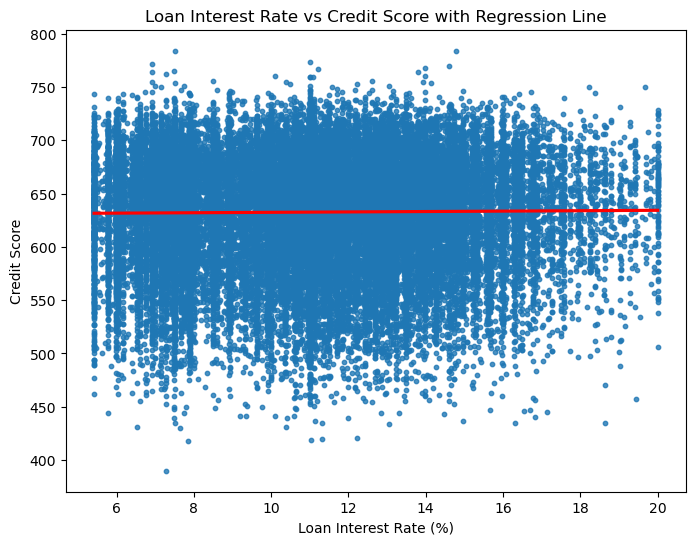

In [14]:
import pandas as pd
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns

# Loading the dataset
file_path = 'C:/Users/maxim/OneDrive/Desktop/BU/DSC 530/loan_data.csv'
data_file = pd.read_csv(file_path)

# Checking if 'loan_int_rate' and 'credit_score' columns exist
if 'loan_int_rate' in data_file.columns and 'credit_score' in data_file.columns:
    # Drop rows with missing values in 'loan_int_rate' or 'credit_score'
    data_file = data_file.dropna(subset=['loan_int_rate', 'credit_score'])

    # Calculating Pearson correlation coefficient between 'loan_int_rate' and 'credit_score'
    if len(data_file['loan_int_rate'].unique()) > 1 and len(data_file['credit_score'].unique()) > 1:
        correlation_rate, p_value_rate = pearsonr(data_file['loan_int_rate'], data_file['credit_score'])
        formatted_p_value_rate = f"{p_value_rate:.4f}"
        print(f"\nPearson correlation coefficient between loan interest rate and credit score: {correlation_rate:.2f}")
        print(f"P-value: {formatted_p_value_rate}")

        # Visualizing the scatter plot with regression line
        plt.figure(figsize=(8, 6))
        sns.regplot(x='loan_int_rate', y='credit_score', data=data_file, scatter_kws={'s': 10}, line_kws={'color': 'red'})
        plt.title('Loan Interest Rate vs Credit Score with Regression Line')
        plt.xlabel('Loan Interest Rate (%)')
        plt.ylabel('Credit Score')
        plt.show()
    else:
        print("\nSkipping correlation calculation due to lack of variability in 'loan_int_rate' or 'credit_score'.")
else:
    print("One or both of the columns 'loan_int_rate' and 'credit_score' do not exist in the dataset.")


The calculated Pearson's correlation coefficient is 0.01, which is extremely low and almost zero. However, the p-value of 0.0176 is lower than the significance level of 5%, indicating that there is statistical significance, meaning the correlation between the two variables is not just a random coincidence.

Nevertheless, the Pearson's correlation coefficient of 0.01 is so small that, in practical terms, it would not be useful and would not tell us anything meaningful since the correlation is almost zero. This suggests that there is almost no relationship between the two variables. There are likely other more important predictors that could have a more significant predictive relationship with loan interest rate and credit score.

###	How does person home ownership relate to credit score?

Null hypothesis (H₀): There is no significant correlation between person home ownership and credit score.

Alternative hypothesis (H₁): There is a significant correlation between person home ownership and credit score.


Pearson correlation coefficient between home ownership and credit score: -0.01
P-value: 0.1576


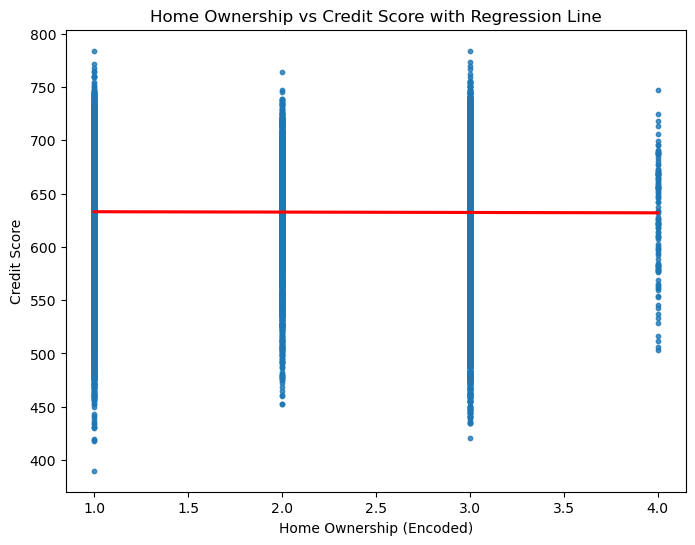

In [15]:
import pandas as pd
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns

# Loading the dataset
file_path = 'C:/Users/maxim/OneDrive/Desktop/BU/DSC 530/loan_data.csv'
data_file = pd.read_csv(file_path)

# Checking if 'person_home_ownership' is a categorical variable and encode it
if data_file['person_home_ownership'].dtype == 'object':
    # Encoding categorical variable into numeric values
    data_file['home_ownership_encoded'] = data_file['person_home_ownership'].map({
        'NONE': 0, 'MORTGAGE': 1, 'OWN': 2, 'RENT': 3, 'OTHER': 4
    })
    home_ownership_column = 'home_ownership_encoded'
else:
    home_ownership_column = 'person_home_ownership'

# Removing rows with NaN values in 'home_ownership_column' or 'credit_score'
data_file_clean = data_file.dropna(subset=[home_ownership_column, 'credit_score'])

# Calculating Pearson correlation coefficient if both variables have variability
if len(data_file_clean[home_ownership_column].unique()) > 1 and len(data_file_clean['credit_score'].unique()) > 1:
    correlation_home, p_value_home = pearsonr(data_file_clean[home_ownership_column], data_file_clean['credit_score'])
    
    # Formatting the p-value for better readability
    formatted_p_value_home = f"{p_value_home:.4f}"
    
    print(f"\nPearson correlation coefficient between home ownership and credit score: {correlation_home:.2f}")
    print(f"P-value: {formatted_p_value_home}")

    # Visualizing the scatter plot with regression line
    plt.figure(figsize=(8, 6))
    sns.regplot(x=home_ownership_column, y='credit_score', data=data_file_clean, scatter_kws={'s': 10}, line_kws={'color': 'red'})
    plt.title('Home Ownership vs Credit Score with Regression Line')
    plt.xlabel('Home Ownership (Encoded)')
    plt.ylabel('Credit Score')
    plt.show()
else:
    print("\nSkipping correlation calculation due to lack of variability in 'person_home_ownership' or 'credit_score'.")


This result shows a calculated Pearson's correlation coefficient of -0.01 between Home Ownership and Credit Score variables. This is an extremely low negative correlation that is close to zero, indicating that there is almost no relationship between the two variables. The p-value of 0.1576 is significantly higher than the significance level of 5%, indicating that this correlation might be just a random occurrence or coincidence. Thus, we fail to reject the null hypothesis and accept the thesis that there is no significant relationship between the two variables. Additionally, the scatter plot visually confirms this by showing a flat red regression line, clearly indicating that there is almost no relationship between the two predictors.